<a href="https://colab.research.google.com/github/ShreySharma15/ShadowFox/blob/main/Image_Tagging_using_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Tagging Model Using CNN**

1. Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

2. Load CIFAR-10 dataset

In [2]:
(x_train, y_train),(x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


3. Normalize values

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0

4. Specifying Class names

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']


5. Data Augmentation

In [5]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)


6. Building CNN Model

In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7. Compile Model

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

8. Early Stopping

In [8]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)



9. Training the Model

In [9]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=50,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stop])


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 187s 235ms/step - accuracy: 0.2249 - loss: 2.0997 - val_accuracy: 0.4018 - val_loss: 1.6014
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 182s 233ms/step - accuracy: 0.3495 - loss: 1.7181 - val_accuracy: 0.4916 - val_loss: 1.3770
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 182s 232ms/step - accuracy: 0.4285 - loss: 1.5337 - val_accuracy: 0.5415 - val_loss: 1.2789
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 183s 234ms/step - accuracy: 0.5088 - loss: 1.3722 - val_accuracy: 0.6038 - val_loss: 1.1030
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 185s 237ms/step - accuracy: 0.5509 - loss: 1.2744 - val_accuracy: 0.6399 - val_loss: 1.0095
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 184s 235ms/step - accuracy: 0.5856 - loss: 1.1801 - val_accuracy: 0.5983 - val_loss: 1.1611
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 185s 236ms/step - accuracy: 0.6136 - loss: 1.1123 - val_accuracy: 0.6841 - val_loss: 0.8947
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 182s 232ms/step - accuracy: 0.6323 - loss: 1.05

10. Evaluate the Model

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"✅ Test Accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.7544 - loss: 0.7146
✅ Test Accuracy: 75.70%


11. Plot Accuracy and loss

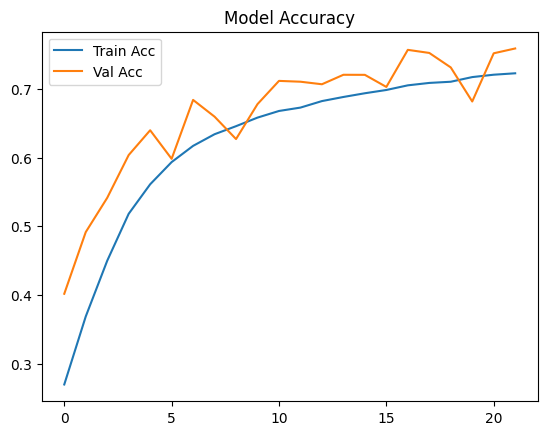

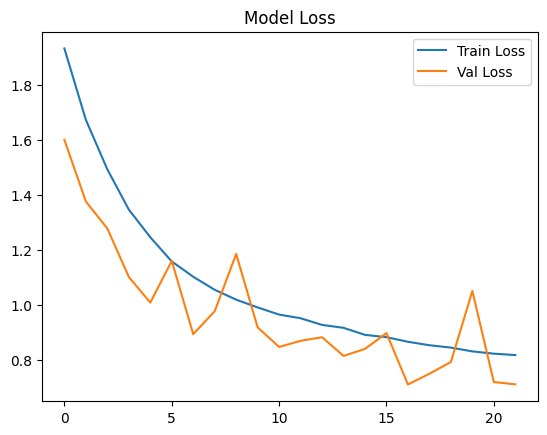

In [11]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

12. Classification Report

In [12]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()
print(classification_report(y_true, y_pred_classes, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
              precision    recall  f1-score   support

    airplane       0.75      0.82      0.79      1000
  automobile       0.89      0.91      0.90      1000
        bird       0.71      0.57      0.64      1000
         cat       0.65      0.46      0.54      1000
        deer       0.76      0.71      0.73      1000
         dog       0.78      0.54      0.64      1000
        frog       0.61      0.94      0.74      1000
       horse       0.77      0.85      0.81      1000
        ship       0.87      0.88      0.87      1000
       truck       0.81      0.90      0.85      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.75     10000
weighted avg       0.76      0.76      0.75     10000



13. Save and Deploy

In [14]:
model.save("cifar10_cnn_model.h5")

In [15]:
from google.colab import files
files.download("cifar10_cnn_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>